

1.   Sample Dataset



In [2]:
import pandas as pd

sensud = {
    'tinggi' : [158, 170, 183, 191, 151, 163, 180, 158, 178],
    'berat'  : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'
    ]
}

sensus_df = pd.DataFrame(sensud)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,151,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita




2.   Visualisasi Data



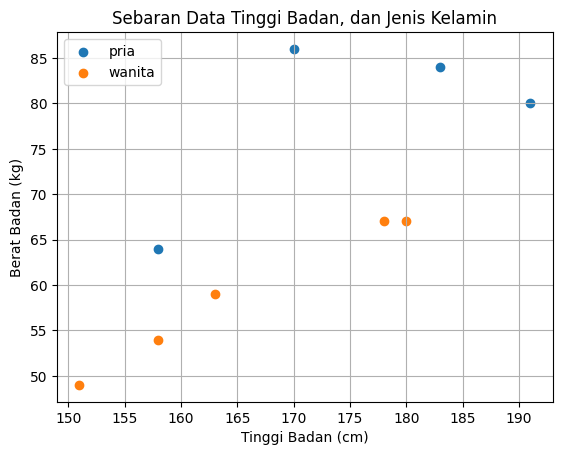

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Preprocessing Dataset

In [5]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train:\n{X_train}\n')
print(f'y_train: {y_train}')

x_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [151  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
print(f'y_train_bin:\n{y_train_bin}')

y_train_bin:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [11]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


Training KNN Classification Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi Jenis Kelamin

In [13]:
tinggi_badan = 155
berat_badan = 70

x_new = np.array([[tinggi_badan, berat_badan]]).reshape(1, -1)
x_new

array([[155,  70]])

In [14]:
y_new = model.predict(x_new)
y_new

array(['wanita'], dtype=object)

Visualisasi Nearest Neighbours

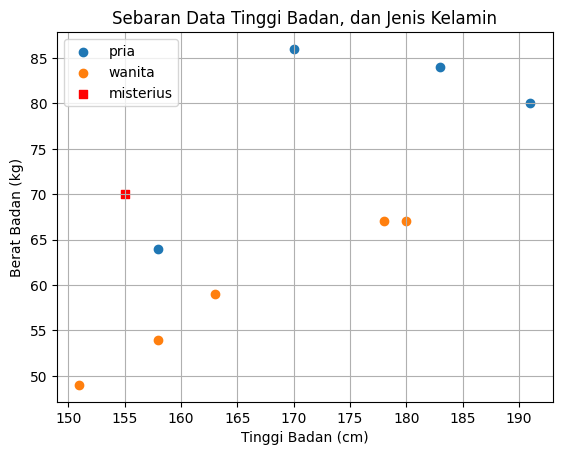

In [19]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan, berat_badan, marker='s', color='red', label='misterius') #Corrected variable name

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Kalkulasi Distance (Eucliden Distance)


In [20]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [21]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [151,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [22]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.37755832643195,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [24]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,151,49,wanita,21.377558
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


Evaluasi KNN Classification Model

1. Testing Set

In [25]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test: [0 0 1 1]


2. Prediksi terhadap testing set

In [26]:
y_pred = model.predict(X_test)
y_pred

array(['wanita', 'pria', 'wanita', 'wanita'], dtype=object)

In [31]:
# In cell ipython-input-26-74baa7fe8ba7
y_pred = model.predict(X_test)
# Convert y_pred to numerical labels using lb.transform
y_pred = lb.transform(y_pred).flatten() # Added this line

y_pred # This will now show numerical labels

array([1, 0, 1, 1])

Accuracy

In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


Precission

In [36]:
from sklearn.metrics import precision_score # Corrected function name

prec = precision_score(y_test, y_pred) # Corrected variable name

print(f'Precission: {prec}')

Precission: 0.6666666666666666


Recall

In [37]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


F1 Score

In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.8


Classification Report

In [39]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



MCC

In [40]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
